## imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import norm
pd.options.display.float_format = '{:.5f}'.format

In [25]:
# preprocessing of data to conform to function input reqs
    # TODO: add num_bins
t = pd.read_csv("color_probs.csv") # true data
p = pd.read_csv("gray_probs.csv")
#true['picid'] = pd.factorize(true['file'])[0]
t = t.rename(columns={"file":"picid"})
t = t.dropna(how='any', subset=['picid'])
t = t.drop(columns='Unnamed: 0')
p = p.rename(columns={"file":"picid"})
p = p.dropna(how='any', subset=['picid'])
p = p.drop(columns='Unnamed: 0')
p = p.loc[p['picid'].isin(t['picid'])]

max_true
4    11978
5      539
6      529
7       78
0       56
8       27
3       22
2        3
dtype: int64
max_pred
4    10087
5     1971
6      899
7      159
3       82
8       24
2       10
dtype: int64
max_true
4           11978
dtype: int64
['0', '2', '3', '4', '5', '6', '7', '8']


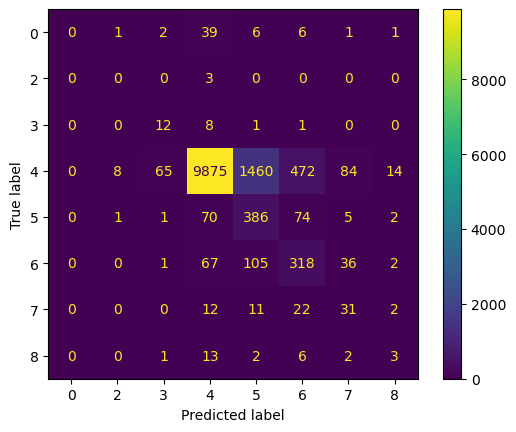

In [194]:
# try out confusion matrix code
true = t
pred = p
pred = pred.reset_index(drop=True)
true = true.reset_index(drop=True)
# check if true and pred are the correct type
if not type(true) == pd.core.frame.DataFrame:
    raise ValueError("true needs to be a pandas dataframe")
if not type(pred) == pd.core.frame.DataFrame:
    raise ValueError("pred needs to be a pandas dataframe")
# check if true and pred contain the right variables
reqvars = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'picid']
for v in reqvars:
    if v not in true.columns:
        raise ValueError("true needs column named " + v)
    if v not in pred.columns:
        raise ValueError("pred needs column named " + v)    
# check that picid is a unique identifier
if not true.nunique()['picid']==len(true):
    raise ValueError("picid does not uniquely identify obs in true")
if not pred.nunique()['picid']==len(pred):
    raise ValueError("picid does not uniquely identify obs in pred")
# check that all picids in true are in pred and vice versa
for i in range(0,len(pred)):
    if pred['picid'][i] not in true.picid.values:
        raise ValueError('all picids in pred need to be in true')
for i in range(0,len(true)):
    if true['picid'][i] not in pred.picid.values:
        raise ValueError('all picids in true need to be in pred')
# check that columns 0 through 9 are numeric
## TODO
true['max_true'] = true[['0', '1', '2', '3', '4', '5', '6', 
                         '7', '8', '9']].idxmax(axis=1)
print(true.value_counts('max_true'))
pred['max_pred'] = pred[['0', '1', '2', '3', '4', '5', '6', 
                         '7', '8', '9']].idxmax(axis=1)
print(pred.value_counts('max_pred'))
tp = true[['picid', 'max_true']].merge(pred[['picid', 'max_pred']], on='picid')
print(tp.value_counts(['max_true'])[:1])
unique = np.unique(tp[['max_true', 'max_pred']].values)
unique.sort()
cm = ConfusionMatrixDisplay(confusion_matrix(tp['max_true'], tp['max_pred']),
                      display_labels=unique)
return cm

In [ ]:
def check_inputs(pred, true):
    """
    This function checks 
    """
    pred = pred.reset_index(drop=True)
    true = true.reset_index(drop=True)
    # check if true and pred are the correct type
    if not type(true) == pd.core.frame.DataFrame:
        raise ValueError("true needs to be a pandas dataframe")
    if not type(pred) == pd.core.frame.DataFrame:
        raise ValueError("pred needs to be a pandas dataframe")
    # check if true and pred contain the right variables
    reqvars = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'picid']
    for v in reqvars:
        if v not in true.columns:
            raise ValueError("true needs column named " + v)
        if v not in pred.columns:
            raise ValueError("pred needs column named " + v)    
    # check that picid is a unique identifier
    if not true.nunique()['picid']==len(true):
        raise ValueError("picid does not uniquely identify obs in true")
    if not pred.nunique()['picid']==len(pred):
        raise ValueError("picid does not uniquely identify obs in pred")
    # check that all picids in true are in pred and vice versa
    for i in range(0,len(pred)):
        if pred['picid'][i] not in true.picid.values:
            raise ValueError('all picids in pred need to be in true')
    for i in range(0,len(true)):
        if true['picid'][i] not in pred.picid.values:
            raise ValueError('all picids in true need to be in pred')
    # check that columns 0 through 9 are numeric
    ## TODO
    return()

In [198]:
def conf_matrix(true, pred):
    """
    This function creates a confusion matrix comparing the true
    "primary color bin" (the bin representing the highest percentage of the photo)
    to the primary color bin predicted by the method in question.
    It takes two arguments: true and pred, which are both pandas
    dataframes including these columns: "picid" which is a unique 
    identifier of each image (and can be used to link across dataframes)
    and ten columns numbered from 0 to 9 which index the bins.
    """
    pred = pred.reset_index(drop=True)
    true = true.reset_index(drop=True)
    # check if true and pred are the correct type
    if not type(true) == pd.core.frame.DataFrame:
        raise ValueError("true needs to be a pandas dataframe")
    if not type(pred) == pd.core.frame.DataFrame:
        raise ValueError("pred needs to be a pandas dataframe")
    # check if true and pred contain the right variables
    reqvars = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'picid']
    for v in reqvars:
        if v not in true.columns:
            raise ValueError("true needs column named " + v)
        if v not in pred.columns:
            raise ValueError("pred needs column named " + v)    
    # check that picid is a unique identifier
    if not true.nunique()['picid']==len(true):
        raise ValueError("picid does not uniquely identify obs in true")
    if not pred.nunique()['picid']==len(pred):
        raise ValueError("picid does not uniquely identify obs in pred")
    # check that all picids in true are in pred and vice versa
    for i in range(0,len(pred)):
        if pred['picid'][i] not in true.picid.values:
            raise ValueError('all picids in pred need to be in true')
    for i in range(0,len(true)):
        if true['picid'][i] not in pred.picid.values:
            raise ValueError('all picids in true need to be in pred')
    # check that columns 0 through 9 are numeric
    ## TODO
    true['max_true'] = true[['0', '1', '2', '3', '4', '5', '6', 
                             '7', '8', '9']].idxmax(axis=1)
    pred['max_pred'] = pred[['0', '1', '2', '3', '4', '5', '6', 
                             '7', '8', '9']].idxmax(axis=1)
    tp = true[['picid', 'max_true']].merge(pred[['picid', 'max_pred']], on='picid')
    unique = np.unique(tp[['max_true', 'max_pred']].values)
    unique.sort()
    cm = ConfusionMatrixDisplay(confusion_matrix(tp['max_true'], tp['max_pred']),
                          display_labels=unique)
    return cm

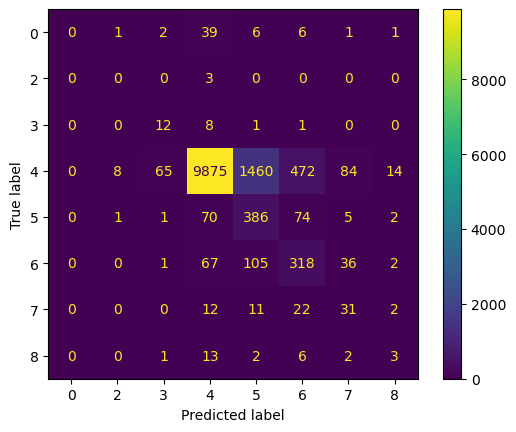

In [199]:
conf_matrix(t, p).plot()

In [80]:
mse = (np.linalg.norm(t[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[0]-
              p[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[0]))**2/10
mses = pd.Series(mse)
index = 1
for j in range(1,len(t)):
    mse = pd.Series((np.linalg.norm(t[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[index]-
              p[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[index]))**2/10)
    mses = pd.concat([mses, mse])
    #print(mses)
    index += 1
print(len(mses))
#mse = (edist ** 2)/10
#print(mses)
p = p.reset_index(drop=True)
t = t.reset_index(drop=True)
t['max_true'] = t[['0', '1', '2', '3', '4', '5', '6', 
                         '7', '8', '9']].idxmax(axis=1)
p['max_pred'] = p[['0', '1', '2', '3', '4', '5', '6', 
                         '7', '8', '9']].idxmax(axis=1)
bools = t['max_true']==p['max_pred']
print(bools.values[:20])
print(len(mses[bools.values]))
print(len(mses[~bools.values]))
#Confirm that MSE is smaller on average when true value is predicted
print(sum(mses[bools.values])/len(mses[bools.values]))
print(sum(mses[~bools.values])/len(mses[~bools.values]))

13232
[ True  True  True  True False  True  True False  True  True  True  True
  True False  True False False False False  True]
10625
2607
0.009855363764705874
0.014670632911392374


In [81]:
def mse_tot(true, pred):
    """
    Returns total mean squared error based on true complexion distribution
    and predicted complexion distribution. 
    It takes two arguments: true and pred, which are both pandas
    dataframes including these columns: "picid" which is a unique 
    identifier of each image (and can be used to link across dataframes)
    and ten columns numbered from 0 to 9 which index the bins.
    """
    pred = pred.reset_index(drop=True)
    true = true.reset_index(drop=True)
    # check if true and pred are the correct type
    if not type(true) == pd.core.frame.DataFrame:
        raise ValueError("true needs to be a pandas dataframe")
    if not type(pred) == pd.core.frame.DataFrame:
        raise ValueError("pred needs to be a pandas dataframe")
    # check if true and pred contain the right variables
    reqvars = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'picid']
    for v in reqvars:
        if v not in true.columns:
            raise ValueError("true needs column named " + v)
        if v not in pred.columns:
            raise ValueError("pred needs column named " + v)    
    # check that picid is a unique identifier
    if not true.nunique()['picid']==len(true):
        raise ValueError("picid does not uniquely identify obs in true")
    if not pred.nunique()['picid']==len(pred):
        raise ValueError("picid does not uniquely identify obs in pred")
    # check that all picids in true are in pred and vice versa
    for i in range(0,len(pred)):
        if pred['picid'][i] not in true.picid.values:
            raise ValueError('all picids in pred need to be in true')
    for i in range(0,len(true)):
        if true['picid'][i] not in pred.picid.values:
            raise ValueError('all picids in true need to be in pred')
    # check that columns 0 through 9 are numeric
    ## TODO
    mse = (np.linalg.norm(t[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[0]-
              p[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[0]))**2/10
    mses = pd.Series(mse)
    index = 1
    for j in range(1,len(t)):
        mse = pd.Series((np.linalg.norm(t[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[index]-
                  p[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[index]))**2/10)
        mses = pd.concat([mses, mse])
        #print(mses)
        index += 1
    finalmse = sum(mses)/len(mses)
    return finalmse

In [84]:
mse_tot(true = t, pred = p)

0.010804079504232194

In [ ]:
def mse_by_bin(true, pred):
    """
    Returns a pandas dataframe with ten mean square error results,
    one for each complexion bin. 
    It takes two arguments: true and pred, which are both pandas
    dataframes including these columns: "picid" which is a unique 
    identifier of each image (and can be used to link across dataframes)
    and ten columns numbered from 0 to 9 which index the bins.
    """
    pred = pred.reset_index(drop=True)
    true = true.reset_index(drop=True)
    # check if true and pred are the correct type
    if not type(true) == pd.core.frame.DataFrame:
        raise ValueError("true needs to be a pandas dataframe")
    if not type(pred) == pd.core.frame.DataFrame:
        raise ValueError("pred needs to be a pandas dataframe")
    # check if true and pred contain the right variables
    reqvars = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'picid']
    for v in reqvars:
        if v not in true.columns:
            raise ValueError("true needs column named " + v)
        if v not in pred.columns:
            raise ValueError("pred needs column named " + v)    
    # check that picid is a unique identifier
    if not true.nunique()['picid']==len(true):
        raise ValueError("picid does not uniquely identify obs in true")
    if not pred.nunique()['picid']==len(pred):
        raise ValueError("picid does not uniquely identify obs in pred")
    # check that all picids in true are in pred and vice versa
    for i in range(0,len(pred)):
        if pred['picid'][i] not in true.picid.values:
            raise ValueError('all picids in pred need to be in true')
    for i in range(0,len(true)):
        if true['picid'][i] not in pred.picid.values:
            raise ValueError('all picids in true need to be in pred')
    # check that columns 0 through 9 are numeric
    ## TODO
    mse = (np.linalg.norm(t[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[0]-
              p[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[0]))**2/10
    mses = pd.Series(mse)
    index = 1
    for j in range(1,len(t)):
        mse = pd.Series((np.linalg.norm(t[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[index]-
                  p[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']].iloc[index]))**2/10)
        mses = pd.concat([mses, mse])
        #print(mses)
        index += 1
    finalmse = sum(mses)/len(mses)
    return finalmse